In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r'..\data\HR_capstone_dataset.csv')

## Data Exploration

Como eu n√£o conhe√ßo o dataset, vou fazer uma explora√ß√£o inicial para entender melhor os dados.
Passos:

1. Carregar o dataset.
2. Verificar as primeiras linhas.
3. Verificar o tipo de dados de cada coluna (Para um poss√≠vel modelo de previs√£o, √© importante que as colunas de interesse estejam no formato num√©rico).
4. Verificar se h√° valores ausentes, dependendo do modelo de previs√£o, pode ser necess√°rio lidar com esses valores.
5. Verificar distribui√ß√µes, outliers e correla√ß√µes entre as vari√°veis.

In [4]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [5]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Primeiras impress√µes

1. Aparentemente minha vari√°vel alvo ser√° a coluna `left` que significa se o funcion√°rio deixou a empresa ou n√£o.
## Descri√ß√£o das Vari√°veis

### Vari√°veis Num√©ricas
- **satisfaction_level**: N√≠vel de satisfa√ß√£o do funcion√°rio
- **last_evaluation**: √öltima avalia√ß√£o de desempenho
- **number_project**: N√∫mero de projetos atribu√≠dos
- **average_montly_hours**: M√©dia de horas mensais trabalhadas
- **time_spend_company**: Tempo na empresa (anos)

### Vari√°veis Bin√°rias
- **Work_accident**: Se teve acidente de trabalho (0/1)
- **left**: Se deixou a empresa (vari√°vel alvo)
- **promotion_last_5years**: Se teve promo√ß√£o nos √∫ltimos 5 anos (0/1)

### Vari√°veis Categ√≥ricas
- **Department**: Departamento do funcion√°rio
- **salary**: N√≠vel salarial (low, medium, high)

In [6]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

Como a maioria das colunas est√£o no formato num√©rico, as √∫nicas que precisarei lidar ser√£o as colunas `Department` e `salary`, que s√£o categ√≥ricas. Mas isso ser√° feito mais adiante, quando eu for preparar os dados para o modelo de previs√£o.

In [7]:
data.shape
# Como cada linha representa um funcion√°rio, h√° 14999 respostas nessa pesquisa.

(14999, 10)

In [8]:
#Ferramentas para visualiza√ß√£o
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
sns.set_theme(style="whitegrid")

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

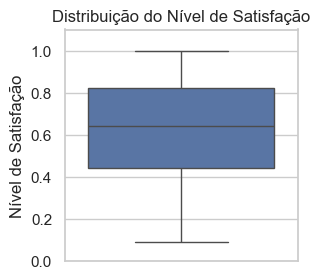

In [10]:
display(data['satisfaction_level'].describe())
plt.figure(figsize=(3, 3))
sns.boxplot(data=data, y='satisfaction_level')
plt.title('Distribui√ß√£o do N√≠vel de Satisfa√ß√£o')
plt.ylabel('N√≠vel de Satisfa√ß√£o')
plt.ylim(0,1.1)
plt.show()

De forma geral o n√≠vel de satisfa√ß√£o n√£o est√° muito bom, a m√©dia √© de 0.61, e 75% dos funcion√°rios est√£o avaliando abaixo de 0.82, pra uma empresa com 15 mil funcion√°rios, isso √© um n√∫mero preocupante.

<Axes: xlabel='salary', ylabel='satisfaction_level'>

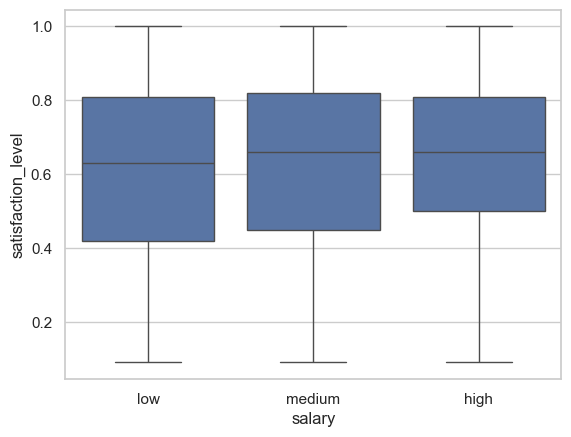

In [11]:
sns.boxplot(x='salary', y='satisfaction_level', data=data)

A primeira vista, a satisfa√ß√£o n√£o parece ser muito afetada pelo n√≠vel de sal√°rio. Suas m√©dias est√£o pr√≥ximas.

<Axes: xlabel='left', ylabel='satisfaction_level'>

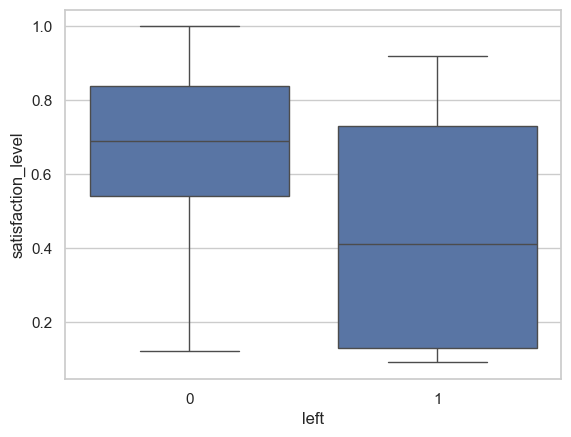

In [12]:
sns.boxplot(x='left', y='satisfaction_level', data=data)

√â bem aparente que o n√≠vel de satisfa√ß√£o √© diferente entre as pessoas que sa√≠ram da empresa e as que n√£o sa√≠ram. A m√©dia de satisfa√ß√£o das pessoas que sa√≠ram √© bem menor do que a das que ficaram.
O que talvez j√° fosse de se esperar, mas √© interessante ver isso nos dados.

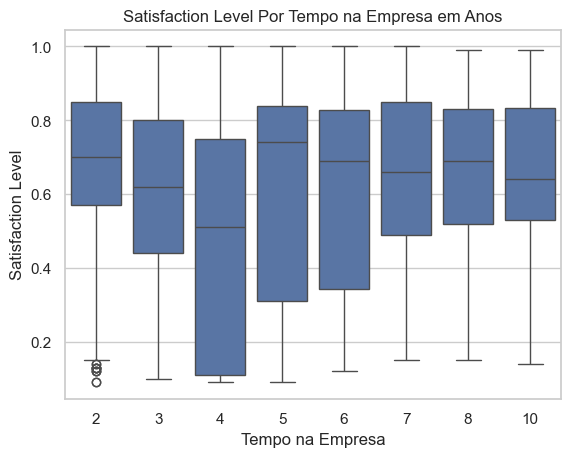

In [13]:
sns.boxplot(x='time_spend_company', y='satisfaction_level', data=data)
plt.title('Satisfaction Level Por Tempo na Empresa em Anos')
plt.xlabel('Tempo na Empresa')
plt.ylabel('Satisfaction Level')
plt.show()

Vamos dar uma olhada mais aprofundada nesses funcion√°rios que est√£o h√° 4 anos na empresa. E tentar entender melhor o que pode ter levado eles a ter uma impress√£o pior da empresa.

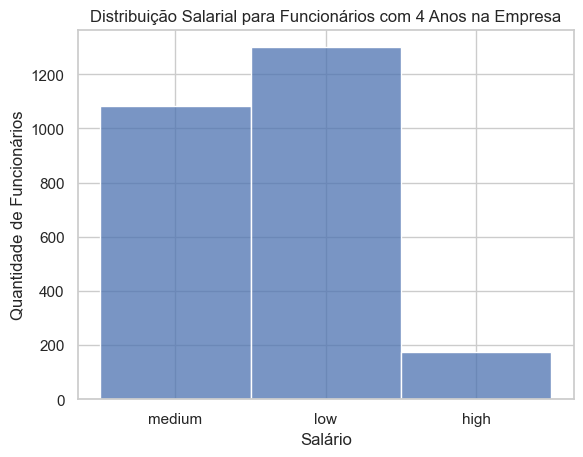

In [14]:
sns.histplot(data=data[data['time_spend_company'] == 4], x='salary', stat='count')
plt.title('Distribui√ß√£o Salarial para Funcion√°rios com 4 Anos na Empresa')
plt.xlabel('Sal√°rio')
plt.ylabel('Quantidade de Funcion√°rios')
plt.show()

Pode se perceber que os funcion√°rios que est√£o h√° 4 anos na empresa possuem ou possu√≠am sal√°rios baixos ou m√©dios. Isso pode ser um indicativo de que esses funcion√°rios n√£o est√£o satisfeitos com o sal√°rio e isso pode ter influenciado na sua decis√£o de sair da empresa.

In [15]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

#### Dado a diferen√ßa na satisfa√ß√£o dos funcion√°rios com 4 anos de empresa, quero comparar algumas vari√°veis entre os funcion√°rios que t√™m 4 anos de empresa e os demais.

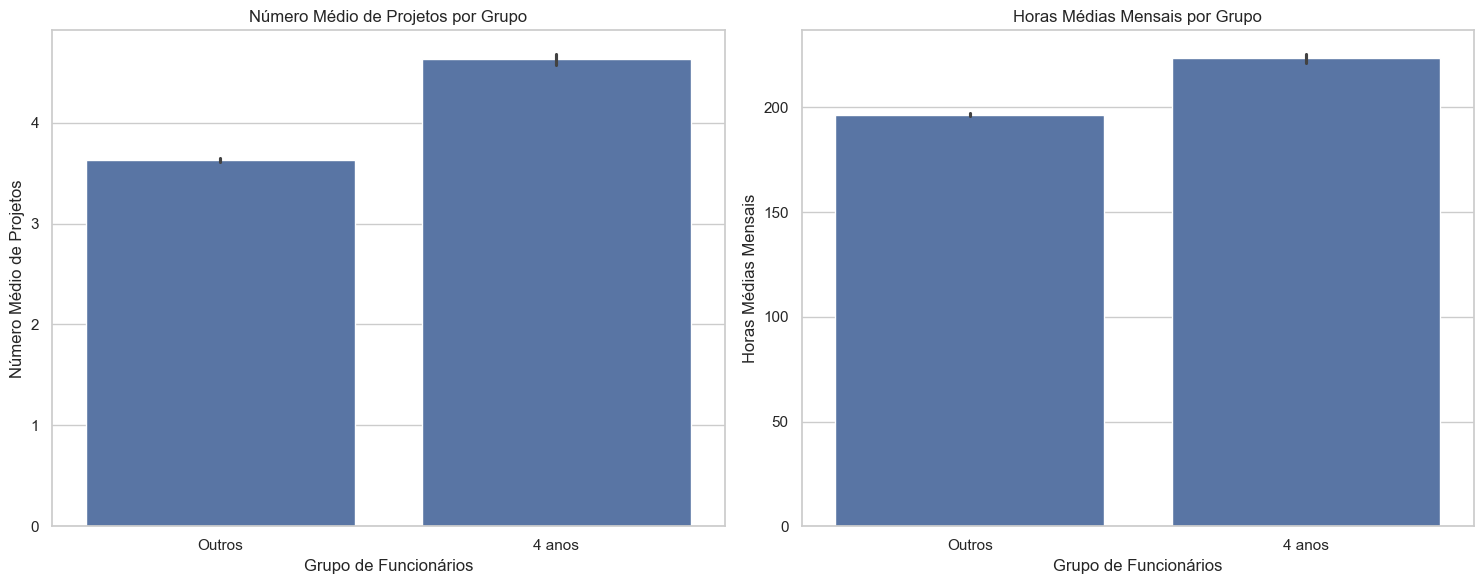

In [16]:
# Criar uma nova coluna para categorizar os funcion√°rios
data['group_4_years'] = data['time_spend_company'].apply(lambda x: '4 anos' if x == 4 else 'Outros')

# Criar subplots para comparar as duas m√©tricas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico 1: N√∫mero m√©dio de projetos
sns.barplot(data=data, x='group_4_years', y='number_project', ax=axes[0])
axes[0].set_title('N√∫mero M√©dio de Projetos por Grupo')
axes[0].set_xlabel('Grupo de Funcion√°rios')
axes[0].set_ylabel('N√∫mero M√©dio de Projetos')

# Gr√°fico 2: Horas m√©dias trabalhadas
sns.barplot(data=data, x='group_4_years', y='average_montly_hours', ax=axes[1])
axes[1].set_title('Horas M√©dias Mensais por Grupo')
axes[1].set_xlabel('Grupo de Funcion√°rios')
axes[1].set_ylabel('Horas M√©dias Mensais')

plt.tight_layout()
plt.show()

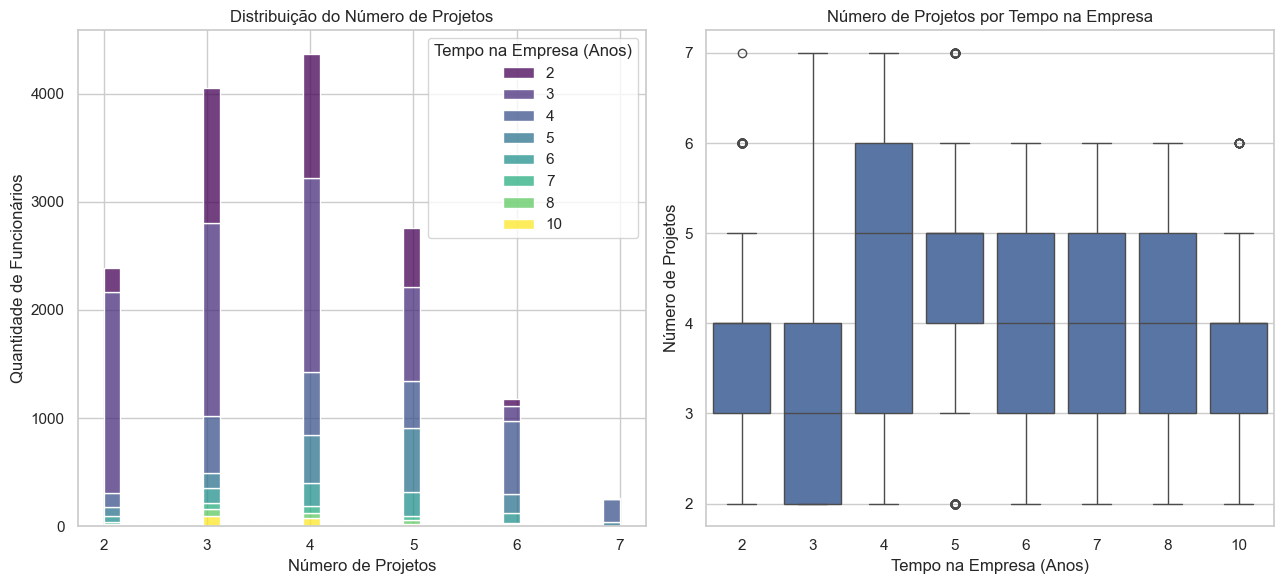

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Gr√°fico 1: N√∫mero m√©dio de projetos
sns.histplot(data=data, x='number_project', ax=axes[0], hue='time_spend_company', multiple='stack', palette='viridis')
leg = axes[0].get_legend()
if leg:
    leg.set_title('Tempo na Empresa (Anos)')
axes[0].set_title('Distribui√ß√£o do N√∫mero de Projetos')
axes[0].set_title('Distribui√ß√£o do N√∫mero de Projetos')
axes[0].set_xlabel('N√∫mero de Projetos')
axes[0].set_ylabel('Quantidade de Funcion√°rios')

# Gr√°fico 2: Horas m√©dias trabalhadas
sns.boxplot(x='time_spend_company', y='number_project', data=data, ax=axes[1])
axes[1].set_title('N√∫mero de Projetos por Tempo na Empresa')
axes[1].set_xlabel('Tempo na Empresa (Anos)')
axes[1].set_ylabel('N√∫mero de Projetos')
plt.tight_layout()
plt.show()

In [18]:
data.groupby('Department').agg({'number_project': 'sum'}).sort_values('number_project', ascending=False)

number_project
Department                 
sales                 15634
technical             10548
support                8479
IT                     4683
product_mng            3434
marketing              3164
RandD                  3033
accounting             2934
hr                     2701
management             2432

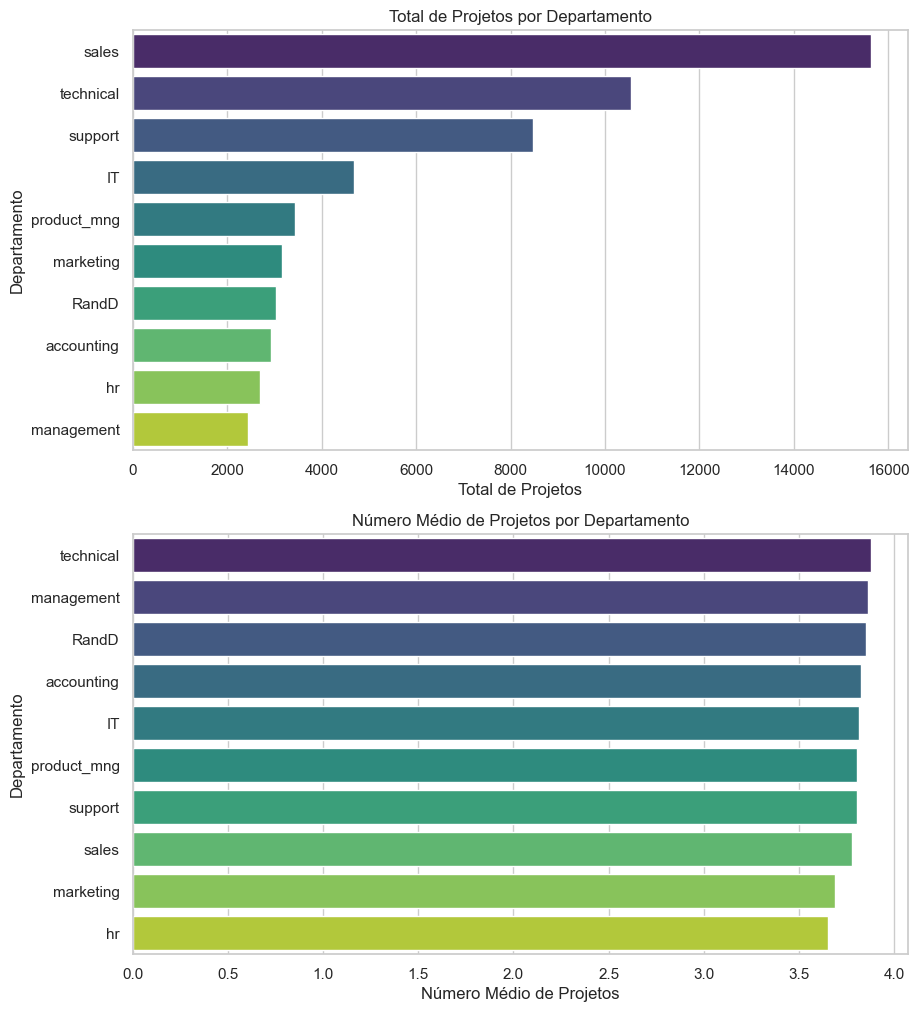

In [19]:
#Criando os objetos de visualiza√ß√£o
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

#Primeiro gr√°fico: Total de Projetos por Departamento
sns.barplot(data=data.groupby('Department').agg({'number_project': 'sum'}).sort_values('number_project', ascending=False), y='Department', x='number_project', hue='Department', legend=False, errorbar=None, ax=axes[0], palette='viridis')
axes[0].set_title('Total de Projetos por Departamento')
axes[0].set_xlabel('Total de Projetos')
axes[0].set_ylabel('Departamento')

#Segundo gr√°fico: N√∫mero m√©dio de projetos por departamento
sns.barplot(data=data.groupby('Department').agg({'number_project': 'mean'}).sort_values('number_project', ascending=False), y='Department', x='number_project', hue='Department', legend=False, errorbar=None, ax=axes[1], palette='viridis')
axes[1].set_title('N√∫mero M√©dio de Projetos por Departamento')
axes[1].set_xlabel('N√∫mero M√©dio de Projetos')
axes[1].set_ylabel('Departamento')
plt.show()


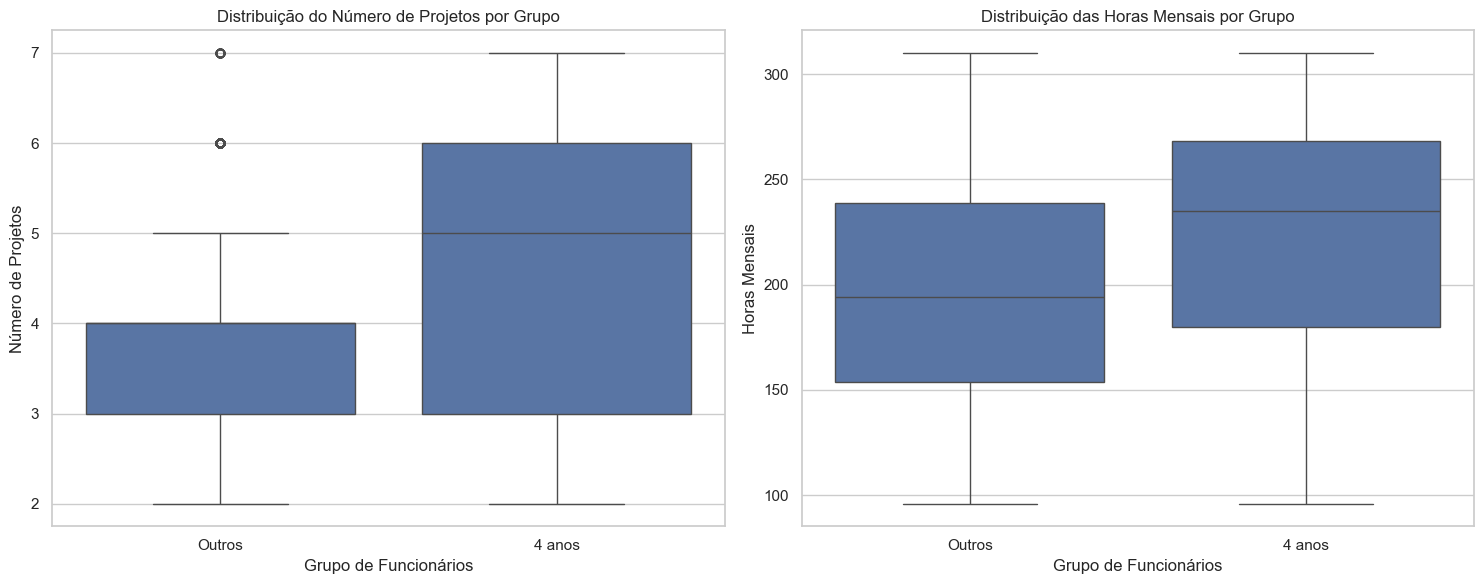

In [20]:
# Boxplots para ver a distribui√ß√£o completa, n√£o apenas as m√©dias
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot 1: N√∫mero de projetos
sns.boxplot(data=data, x='group_4_years', y='number_project', ax=axes[0])
axes[0].set_title('Distribui√ß√£o do N√∫mero de Projetos por Grupo')
axes[0].set_xlabel('Grupo de Funcion√°rios')
axes[0].set_ylabel('N√∫mero de Projetos')

# Boxplot 2: Horas trabalhadas
sns.boxplot(data=data, x='group_4_years', y='average_montly_hours', ax=axes[1])
axes[1].set_title('Distribui√ß√£o das Horas Mensais por Grupo')
axes[1].set_xlabel('Grupo de Funcion√°rios')
axes[1].set_ylabel('Horas Mensais')

plt.tight_layout()
plt.show()

üí° A partir destes dois gr√°ficos √© poss√≠vel afirmar que os funcion√°rios que est√£o h√° 4 anos na empresa possuem uma m√©dia de horas mensais trabalhadas maior do que os demais funcion√°rios. Isso pode ser um indicativo de que esses funcion√°rios est√£o trabalhando mais horas do que os demais e isso pode ter influenciado na sua decis√£o de sair da empresa, por acharem injusto trabalhar mais horas e receber o mesmo sal√°rio ou at√© menor do que os demais funcion√°rios. 

Vamos investigar se h√° uma rela√ß√£o entre esses funcion√°rios e a quantidade de pessoas que saem da empresa.

Taxa de Rotatividade por Grupo:
Funcion√°rios com 4 anos: 34.8%
Outros funcion√°rios: 21.5%


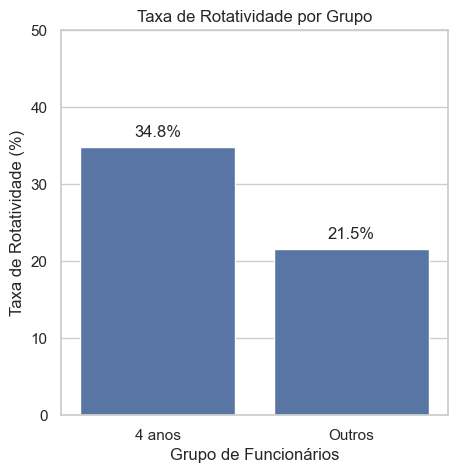

In [21]:
# Calcular a taxa de rotatividade para cada grupo
rotation_rate = data.groupby('group_4_years')['left'].agg(['count', 'sum']).reset_index()
rotation_rate['retention_rate'] = (rotation_rate['count'] - rotation_rate['sum']) / rotation_rate['count'] * 100
rotation_rate['turnover_rate'] = rotation_rate['sum'] / rotation_rate['count'] * 100

print("Taxa de Rotatividade por Grupo:")
print(f"Funcion√°rios com 4 anos: {rotation_rate[rotation_rate['group_4_years'] == '4 anos']['turnover_rate'].iloc[0]:.1f}%")
print(f"Outros funcion√°rios: {rotation_rate[rotation_rate['group_4_years'] == 'Outros']['turnover_rate'].iloc[0]:.1f}%")

# Visualizar
plt.figure(figsize=(5, 5))
sns.barplot(data=rotation_rate, x='group_4_years', y='turnover_rate')
plt.title('Taxa de Rotatividade por Grupo')
plt.ylabel('Taxa de Rotatividade (%)')
plt.xlabel('Grupo de Funcion√°rios')
plt.ylim(0, 50)

# Adicionar valores nas barras
for i, v in enumerate(rotation_rate['turnover_rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

‚ö†Ô∏è Pra finalizar a conclus√£o, podemos afirmar que funcion√°rios que est√£o a 4 anos na empresa, tem uma taxa de sa√≠da maior do que os demais funcion√°rios. E o motivo n√£o √© apenas o tempo de empresa mas o fato de que estes colaboradores estarem trabalhando mais e seus sal√°rios n√£o s√£o proporcionais a isso, principalmente se eles se compararem aos outros.

In [22]:
data.head(2)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   

   salary group_4_years  
0     low        Outros  
1  medium        Outros

In [23]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

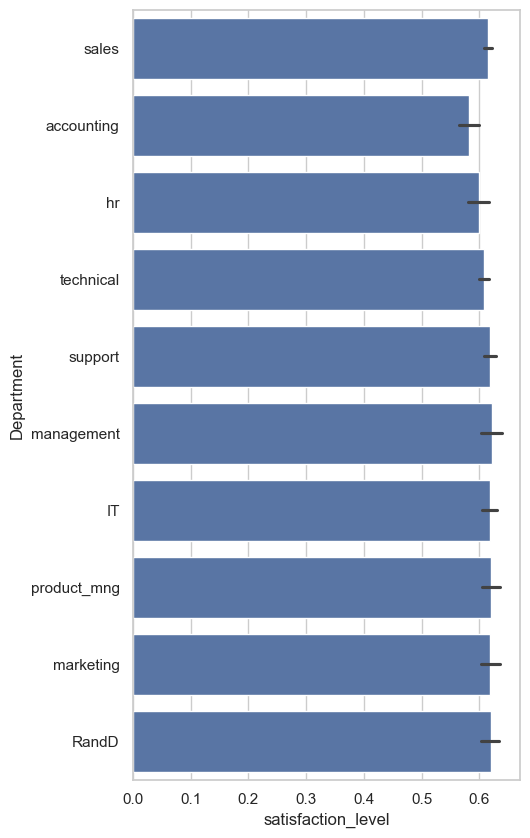

In [24]:
plt.figure(figsize=(5, 10))
sns.barplot(data=data, y='Department', x='satisfaction_level')
plt.show()

Aqui pode-se ver que o n√≠vel de satisfa√ß√£o entre os diferentes setores da empresa √© bem similar. O departamento "Accounting" tem uma satisfa√ß√£o geral menor, por√©m n√£o talvez suficientemente para decretar que h√° um problema.
Por√©m, vamos verificar especificamente para os funcion√°rios que est√£o h√° 4 anos na empresa, para ver se h√° alguma diferen√ßa significativa entre os setores.

In [25]:
data['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

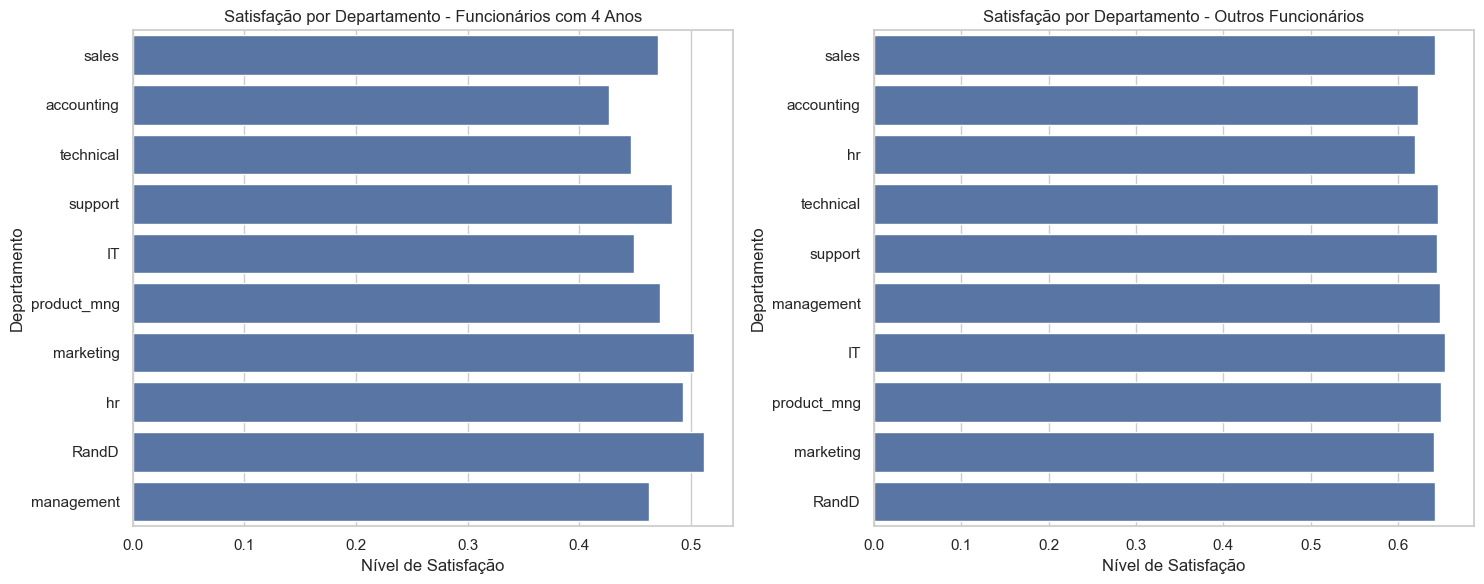

In [26]:
# Comparar satisfa√ß√£o entre funcion√°rios com 4 anos vs outros
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico 1: Funcion√°rios com 4 anos de empresa
sns.barplot(data=data[data['time_spend_company']==4], y='Department', x='satisfaction_level', errorbar=None, ax=axes[0])
axes[0].set_title('Satisfa√ß√£o por Departamento - Funcion√°rios com 4 Anos')
axes[0].set_xlabel('N√≠vel de Satisfa√ß√£o')
axes[0].set_ylabel('Departamento')

# Gr√°fico 2: Outros funcion√°rios (n√£o 4 anos)
sns.barplot(data=data[data['time_spend_company']!=4], y='Department', x='satisfaction_level', ax=axes[1], errorbar=None)
axes[1].set_title('Satisfa√ß√£o por Departamento - Outros Funcion√°rios')
axes[1].set_xlabel('N√≠vel de Satisfa√ß√£o')
axes[1].set_ylabel('Departamento')

plt.tight_layout()
plt.show()

Aqui, apesar de o n√≠vel de satisfa√ß√£o entre os funcion√°rios que est√£o h√° 4 anos na empresa dentre os setores ser similar, podemos ver que est√° abaixo de `0.5` em praticamente todos os setores. Ent√£o pode-se afirmar que os funcion√°rios que est√£o h√° 4 anos na empresa est√£o insatisfeitos com a empresa, independente do setor.

Por√©m de forma geral, um n√≠vel de satisfa√ß√£o abaixo de `0.8` j√° √© um indicativo de que o funcion√°rio n√£o est√° satisfeito com a empresa. Ent√£o, mesmo que o n√≠vel de satisfa√ß√£o esteja acima de `0.5`, ainda assim √© um indicativo de que os funcion√°rios est√£o insatisfeitos com a empresa.

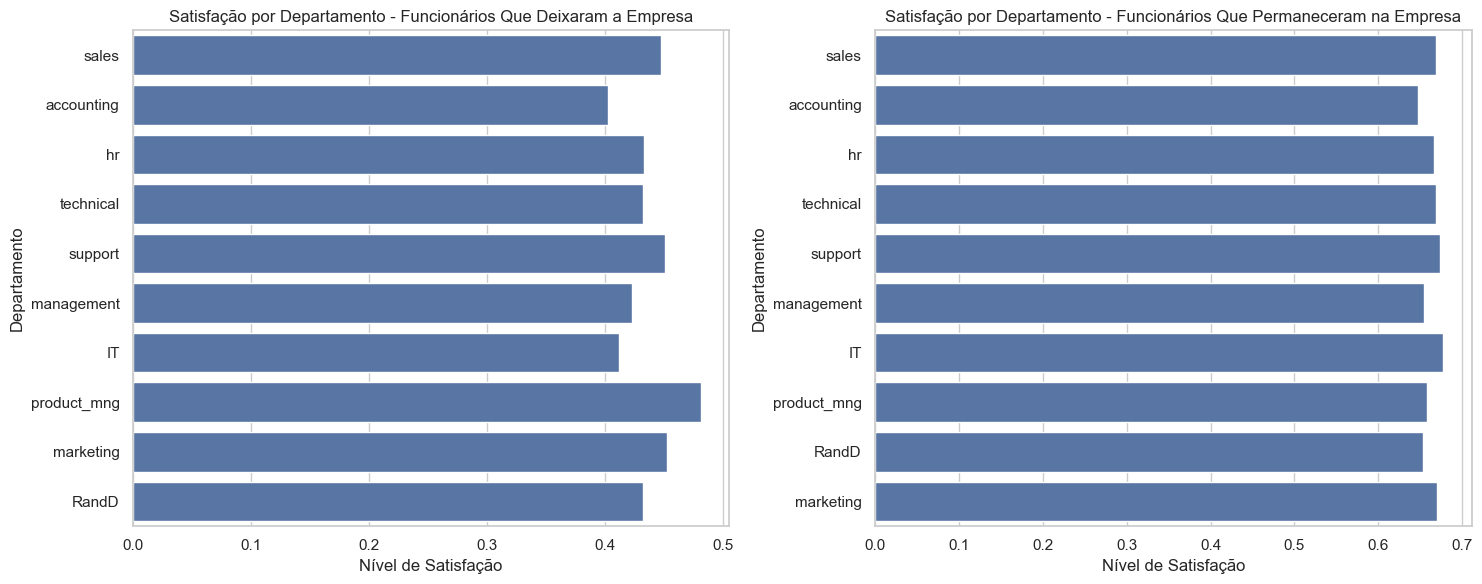

In [27]:
# Comparar satisfa√ß√£o entre funcion√°rios com 4 anos vs outros
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico 1: Funcion√°rios com 4 anos de empresa
sns.barplot(data=data[data['left']==1], y='Department', x='satisfaction_level', errorbar=None, ax=axes[0])
axes[0].set_title('Satisfa√ß√£o por Departamento - Funcion√°rios Que Deixaram a Empresa')
axes[0].set_xlabel('N√≠vel de Satisfa√ß√£o')
axes[0].set_ylabel('Departamento')

# Gr√°fico 2: Outros funcion√°rios (n√£o 4 anos)
sns.barplot(data=data[data['left']!=1], y='Department', x='satisfaction_level', ax=axes[1], errorbar=None)
axes[1].set_title('Satisfa√ß√£o por Departamento - Funcion√°rios Que Permaneceram na Empresa')
axes[1].set_xlabel('N√≠vel de Satisfa√ß√£o')
axes[1].set_ylabel('Departamento')

plt.tight_layout()
plt.show()

In [28]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary group_4_years  
0     low        Outros  
1  medium        Outros  
2  medium        4 anos  
3     low        Outros  
4     low        Outros

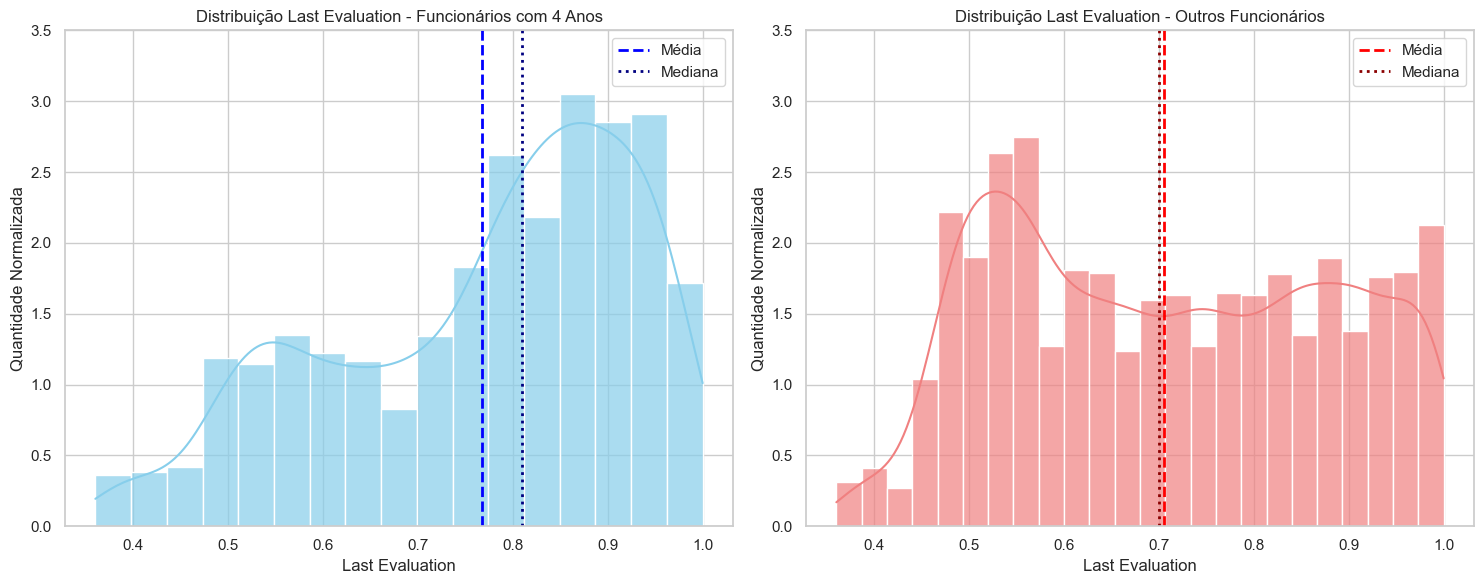

In [29]:
# Comparar last_evaluation entre os grupos com densidade normalizada
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico 1: Funcion√°rios com 4 anos
sns.histplot(data=data[data['time_spend_company']==4], x='last_evaluation', 
             stat='density', ax=axes[0], color='skyblue', alpha=0.7, kde=True)
#Aqui foi usado o par√¢metro `stat='density'` para normalizar a quantidade de funcion√°rios, permitindo uma compara√ß√£o justa entre os grupos.
axes[0].set_title('Distribui√ß√£o Last Evaluation - Funcion√°rios com 4 Anos')
axes[0].set_xlabel('Last Evaluation')
axes[0].set_ylabel('Quantidade Normalizada')
axes[0].set_ylim((0, 3.5)) # For√ßar o limite do eixo y para melhor visualiza√ß√£o e igualar escalas

# M√©dia e mediana para funcion√°rios com 4 anos
media_4 = data[data['time_spend_company']==4]['last_evaluation'].mean()
mediana_4 = data[data['time_spend_company']==4]['last_evaluation'].median()
axes[0].axvline(media_4, color='blue', linestyle='--', linewidth=2, label='M√©dia')
axes[0].axvline(mediana_4, color='navy', linestyle=':', linewidth=2, label='Mediana')
axes[0].legend()

# Gr√°fico 2: Outros funcion√°rios
sns.histplot(data=data[data['time_spend_company']!=4], x='last_evaluation', 
             stat='density', ax=axes[1], color='lightcoral', alpha=0.7, kde=True)
axes[1].set_title('Distribui√ß√£o Last Evaluation - Outros Funcion√°rios')
axes[1].set_xlabel('Last Evaluation')
axes[1].set_ylabel('Quantidade Normalizada')
axes[1].set_ylim((0, 3.5))  # For√ßar o limite do eixo y para melhor visualiza√ß√£o e igualar escalas

# M√©dia e mediana para outros funcion√°rios
media_outros = data[data['time_spend_company']!=4]['last_evaluation'].mean()
mediana_outros = data[data['time_spend_company']!=4]['last_evaluation'].median()
axes[1].axvline(media_outros, color='red', linestyle='--', linewidth=2, label='M√©dia')
axes[1].axvline(mediana_outros, color='darkred', linestyle=':', linewidth=2, label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

<Axes: xlabel='left', ylabel='satisfaction_level'>

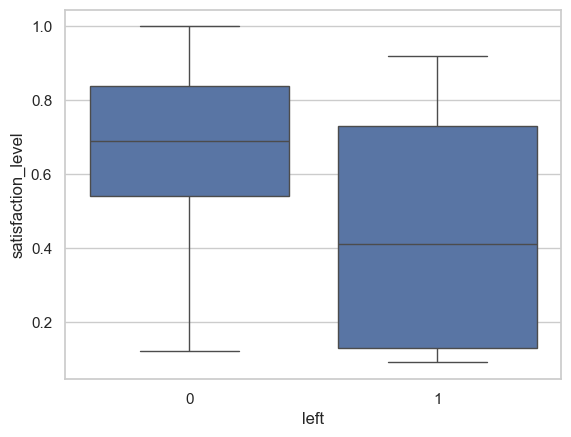

In [30]:
sns.boxplot(x='left', y='satisfaction_level', data=data)

Apenas para quest√µes de confirma√ß√£o, o boxplot acima confirma que funcion√°rios que deixaram a empresa possuem uma m√©dia de satisfa√ß√£o menor do que os que n√£o deixaram. E isso √© bem evidente, pois a m√©dia de satisfa√ß√£o dos funcion√°rios que deixaram a empresa est√° abaixo de `0.5`, enquanto a m√©dia dos que n√£o deixaram est√° acima de `0.5`.

Apesar de ser uma vari√°vel '√≥bvia', irei construir o modelo utilizando-a e ver o que o modelo traz de insights.

Ap√≥s os resultados, um novo modelo ser√° criado sem essa vari√°vel para ver se h√° alguma diferen√ßa significativa nos resultados.

<Axes: xlabel='time_spend_company', ylabel='Count'>

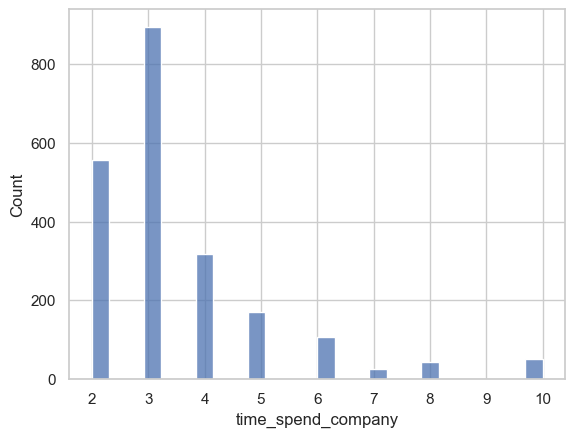

In [31]:
sns.histplot( data=data[ data['Work_accident'] ==1 ], x='time_spend_company', stat='count')

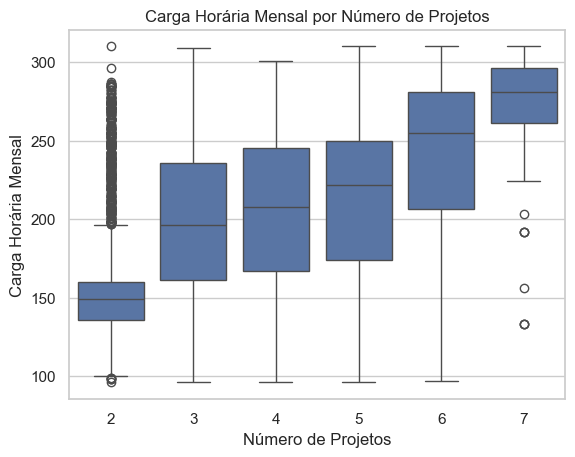

In [32]:
#Como esperado quanto maior o n√∫mero de projetos, maior a carga hor√°ria mensal.
sns.boxplot(data=data, x='number_project', y='average_montly_hours')
plt.title('Carga Hor√°ria Mensal por N√∫mero de Projetos')
plt.xlabel('N√∫mero de Projetos')
plt.ylabel('Carga Hor√°ria Mensal')
plt.show()

In [33]:
#Verificando o balanceamento da vari√°vel 'left' que √© a vari√°vel alvo do modelo.
data['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

## Decision Tree

A ideia agora √© criar um modelo de previs√£o para tentar prever se um funcion√°rio vai deixar a empresa ou n√£o, baseado nas vari√°veis dispon√≠veis.
Para isso, vamos utilizar o algoritmo de Decision Tree, que √© um algoritmo de aprendizado de m√°quina que cria uma √°rvore de decis√£o para classificar os dados.

Isso poder√° ajudar a empresa a identificar antecipadamente a sa√≠da de um funcion√°rio e tomar medidas para evitar isso, como oferecer um aumento salarial, uma promo√ß√£o ou at√© mesmo uma mudan√ßa de setor.

Por qu√™ decision tree?
- √â um algoritmo simples e f√°cil de entender.
- √â um algoritmo que lida bem com dados desbalanceados.
- √â um algoritmo que pode lidar com dados categ√≥ricos e num√©ricos.

O objetivo √© entender quais as vari√°veis mais importantes para prever a sa√≠da de um funcion√°rio.

‚ö†Ô∏è Apesar de haver um desequil√≠brio no dataset de pessoas que deixaram e n√£o deixaram a empresa (80/20), usando random forest, podemos lidar com isso. O algoritmo de random forest √© robusto o suficiente para lidar com esse tipo de desequil√≠brio.

In [34]:
#Imports:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [35]:
#Pra relembrar a estrutura dos dados.
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary group_4_years  
0     low        Outros  
1  medium        Outros  
2  medium        4 anos  
3     low        Outros  
4     low        Outros

In [36]:
data.dtypes
#Conferindo os tipos de dados, todos est√£o corretos para o modelo de machine learning.

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
group_4_years             object
dtype: object

As colunas `Department` e `salary` s√£o categ√≥ricas, ent√£o precisamos transform√°-las em vari√°veis num√©ricas para que o modelo possa utiliz√°-las. Para isso, vamos utilizar o m√©todo `get_dummies` do pandas, que cria vari√°veis dummy (0/1) para cada categoria.

In [37]:
len(data['Department'].unique())

10

üí≠ Pensando melhor, quando olhei para o n√≠vel de satisfa√ß√£o dos funcion√°rios entre os departamentos, elas eram bem semelhantes.
Dessa forma n√£o irei utilizar o departamento como uma vari√°vel de entrada para o modelo, pois n√£o parece ser uma vari√°vel relevante para a previs√£o da sa√≠da do funcion√°rio.


In [38]:
#Irei utilizar uma outra vari√°vel pra deixar apenas as colunas de interesse para o modelo.
data_subset = data.drop(columns=['Department', 'group_4_years'])

In [39]:
data_subset.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  
0                   3              0     1                      0     low  
1                   6              0     1                      0  medium  
2                   4              0     1                      0  medium  
3                   5              0     1                      0     low  
4                   3              0     1                      0     low

In [40]:
data_subset = pd.get_dummies(data_subset, columns=['salary'], drop_first=True, dtype=int)
data_subset.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary_low  \
0                   3              0     1                      0           1   
1                   6              0     1                      0           0   
2                   4              0     1                      0           0   
3                   5              0     1                      0           1   
4                   3              0     1                      0           1   

   salary_medium  
0              0  
1              1  
2              1  
3              0  
4              0

In [41]:
data_subset.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
salary_low                 int64
salary_medium              int64
dtype: object

### Agora com todas as vari√°veis no formato num√©rico, podemos prosseguir com a cria√ß√£o do modelo de Decision Tree.

In [42]:
# # Define the y (target) variable
# y = churn_df['Exited']

# # Define the X (predictor) variables
# X = churn_df.copy()
# X = X.drop('Exited', axis=1)

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=0.25, stratify=y, 
#                                                     random_state=42)

#Vamos definir as vari√°veis, target e features.

y = data_subset['left']
X = data_subset.drop(columns=['left'], axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, stratify=y, 
                                                    random_state=42)
#Aqui utilizo o argumento stratify para garantir que a propor√ß√£o de classes (left) seja mantida tanto no conjunto de treino quanto no de teste.

In [44]:
#Iniciando o modelo de Random Forest
decision_tree = DecisionTreeClassifier(random_state=0)

# Ajustando o modelo aos dados de treino
decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [45]:
#Para visualizar o modelo e m√©tricas de performance:
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [46]:
# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.977
Precision: 0.942
Recall: 0.963
F1 Score: 0.952


O modelo teve uma √≥tima performance geral, mas a m√©trica que interessa no momento √© a `recall`, que √© a capacidade do modelo de identificar corretamente os funcion√°rios que sa√≠ram da empresa. A `recall` foi de `0.963`, o que significa que o modelo conseguiu identificar 96.3% dos funcion√°rios que sa√≠ram da empresa. Isso √© um √≥timo resultado, pois significa que o modelo √© capaz de identificar a grande maioria dos funcion√°rios que saem da empresa.

In [47]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Aceita como argumento o objeto do modelo, os dados X (teste ou valida√ß√£o) e os dados y (teste ou valida√ß√£o).
    Retorna a matriz de confus√£o para as previs√µes nos dados y.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot(values_format='')  # `values_format=''` para evitar nota√ß√£o cient√≠fica
    plt.grid(False)  # Para melhor visibilidade
    plt.show()

In [48]:
X_test.shape

(3750, 9)

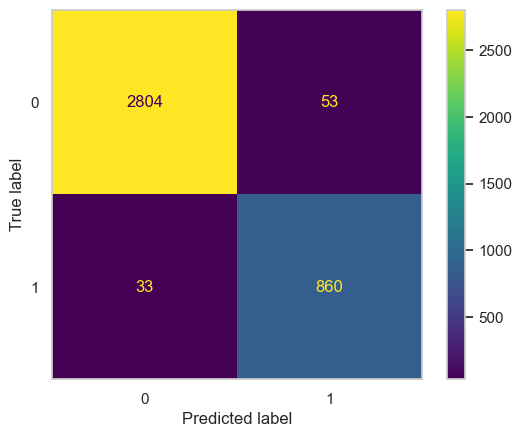

In [49]:
conf_matrix_plot(decision_tree, X_test, y_test)

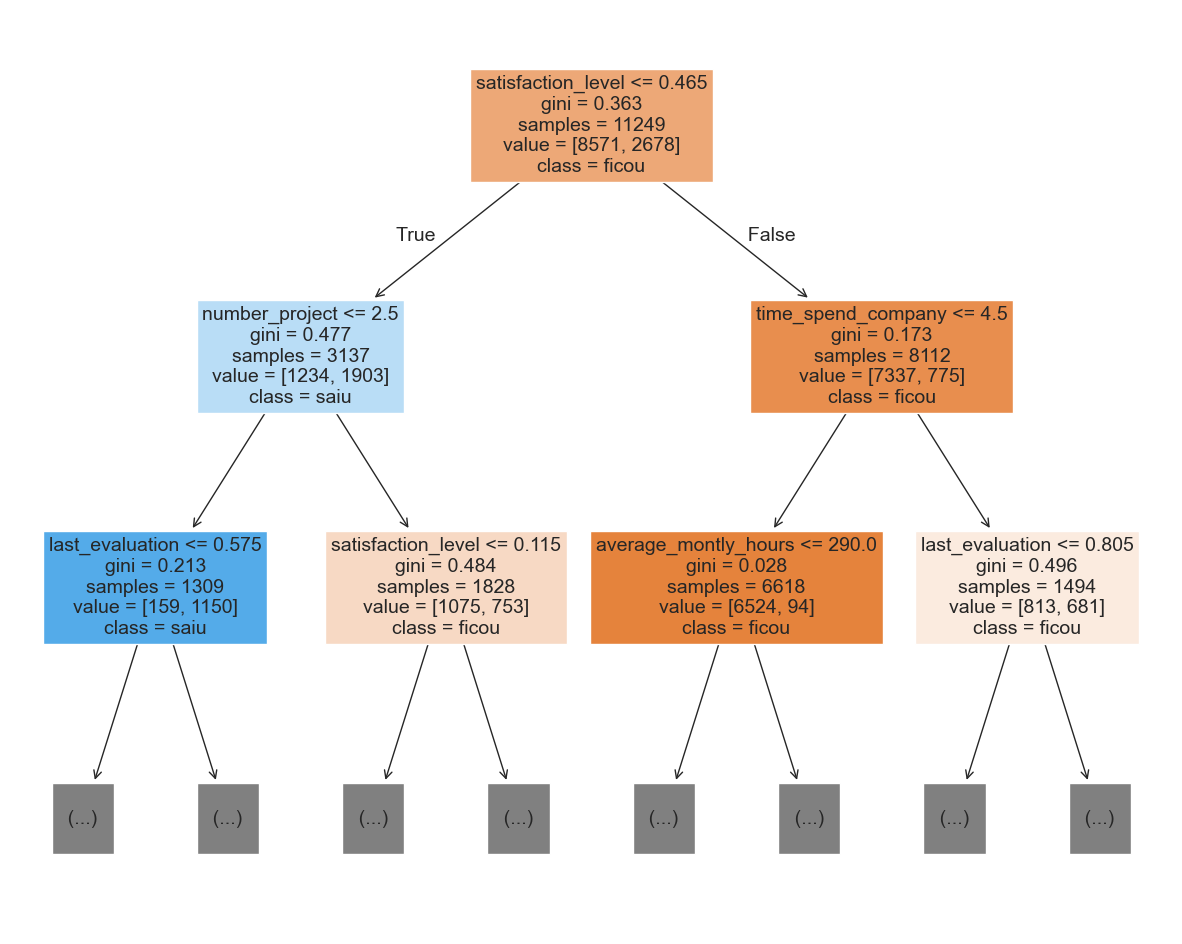

In [50]:
# Vamos ver a √°rvore de decis√£o do modelo, para entender melhor como ele est√° tomando as decis√µes.
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns, 
          class_names={0:'ficou', 1:'saiu'}, filled=True);
plt.show()

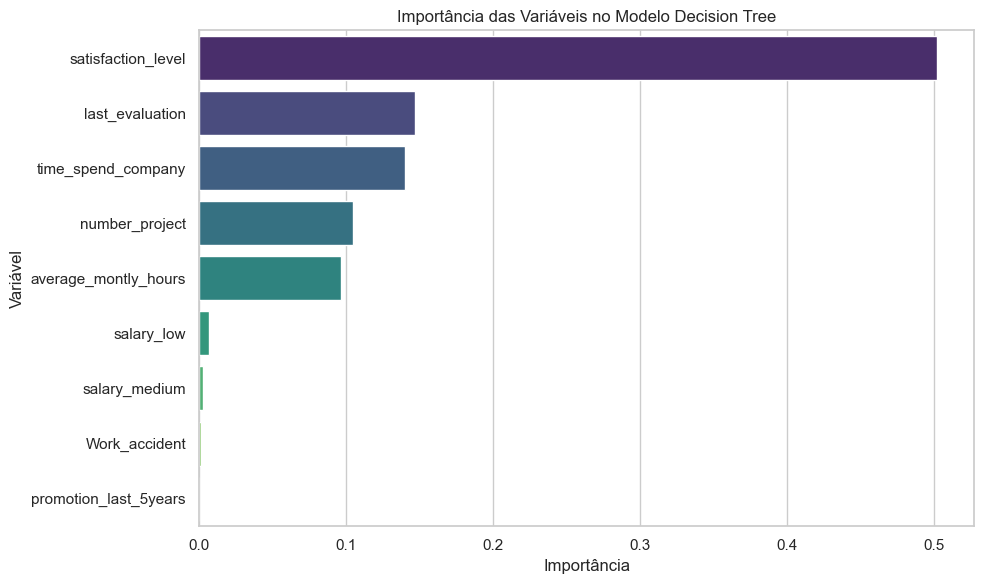

In [51]:
importances = decision_tree.feature_importances_
features = X.columns

# Ordena por import√¢ncia
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis", hue=features[indices])
plt.title('Import√¢ncia das Vari√°veis no Modelo Decision Tree')
plt.xlabel('Import√¢ncia')
plt.ylabel('Vari√°vel')
plt.tight_layout()
plt.show()

Ap√≥s o resultado do modelo, ficou claro o impacto da vari√°vel `satisfaction_level` na sa√≠da do funcion√°rio. A vari√°vel `satisfaction_level` √© a mais importante para prever se um funcion√°rio vai deixar a empresa ou n√£o, seguida por `last_evaluation` e `time_spend_company`.

Podemos ver tamb√©m que as vari√°veis `salary_low` e `salary_medium` n√£o possuem um impacto significativo na sa√≠da do funcion√°rio, o que pode indicar que o sal√°rio n√£o √© um fator determinante para a sa√≠da do funcion√°rio assim como `Work_accident` e `promotion_last_5years`, que tamb√©m n√£o possuem um impacto significativo na sa√≠da do funcion√°rio.

Por√©m, por ser uma vari√°vel muito √≥bvia na correla√ß√£o com a sa√≠da do funcion√°rio, talvez n√£o seja interessante utilizar, pois ela pode talvez esconder outras vari√°veis que poderiam ser mais relevantes para a previs√£o da sa√≠da do funcion√°rio.

A partir disso, vamos testar novamente o mesmo modelo, por√©m desconsiderando a vari√°vel `satisfaction_level` para ver se h√° alguma diferen√ßa significativa nas outras vari√°veis.

In [52]:
# Crie um novo conjunto de dados sem satisfaction_level
X_no_satisfaction = data_subset.drop(columns=['left', 'satisfaction_level'], axis=1)
y_no_satisfaction = data_subset['left']

# Separe treino e teste
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X_no_satisfaction, y_no_satisfaction, test_size=0.25, stratify=y_no_satisfaction, random_state=42
)

# Novo modelo
decision_tree_ns = DecisionTreeClassifier(random_state=0, max_depth=4)
decision_tree_ns.fit(X_train_ns, y_train_ns)
dt_pred_ns = decision_tree_ns.predict(X_test_ns)

# Avalie as m√©tricas
print("Modelo sem satisfaction_level:")
print("Accuracy:", "%.3f" % accuracy_score(y_test_ns, dt_pred_ns))
print("Precision:", "%.3f" % precision_score(y_test_ns, dt_pred_ns))
print("Recall:", "%.3f" % recall_score(y_test_ns, dt_pred_ns))
print("F1 Score:", "%.3f" % f1_score(y_test_ns, dt_pred_ns))

Modelo sem satisfaction_level:
Accuracy: 0.944
Precision: 0.850
Recall: 0.931
F1 Score: 0.888


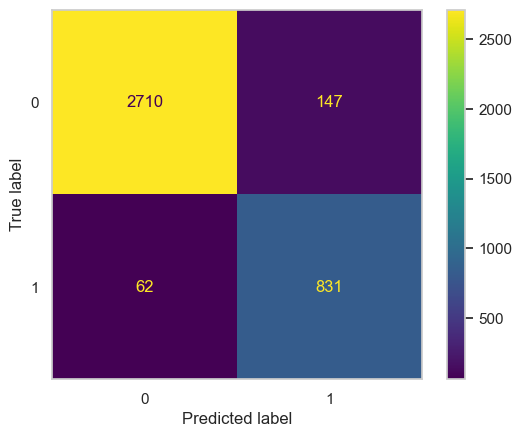

In [53]:
conf_matrix_plot(decision_tree_ns, X_test_ns, y_test_ns)

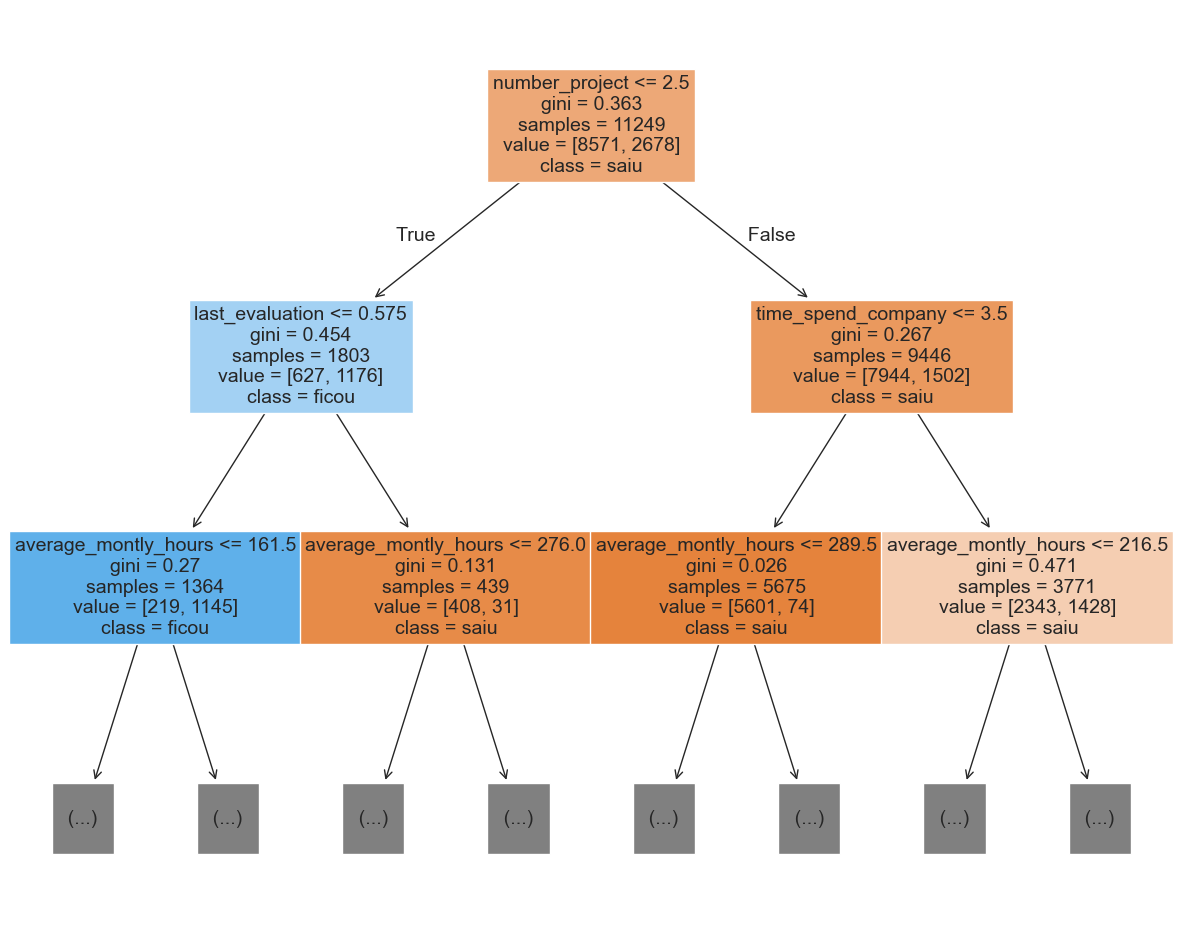

In [54]:
# Vamos ver a √°rvore de decis√£o do modelo, para entender melhor como ele est√° tomando as decis√µes.
plt.figure(figsize=(15,12))
plot_tree(decision_tree_ns, max_depth=2, fontsize=14, feature_names=X_no_satisfaction.columns, 
          class_names={0:'saiu', 1:'ficou'}, filled=True);
plt.show()

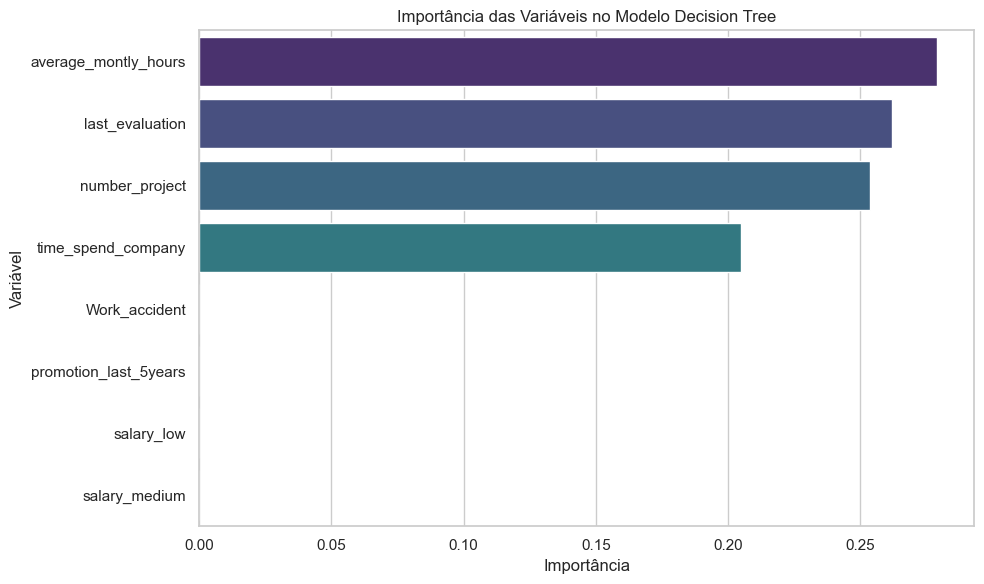

In [55]:
importances_ns = decision_tree_ns.feature_importances_
features_ns = X_no_satisfaction.columns

# Ordena por import√¢ncia
indices = importances_ns.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_ns[indices], y=features_ns[indices], palette="viridis", hue=features_ns[indices])
plt.title('Import√¢ncia das Vari√°veis no Modelo Decision Tree')
plt.xlabel('Import√¢ncia')
plt.ylabel('Vari√°vel')
plt.tight_layout()
plt.show()

Dado o resultado do modelo, podemos ir para um modelo de regress√£o log√≠stica, que √© um modelo mais simples e f√°cil de interpretar, que podemoos utilizar para indicar a probabilidade de um funcion√°rio deixar a empresa ou n√£o, e um poss√≠vel impacto. Utilizaremos as vari√°veis `average_montly_hours`, `last_evaluation`, `number_project`, e `time_spend_company` visto que elas tiveram o maior impacto nesse primeiro modelo, sem considerar o n√≠vel de satisfa√ß√£o, que n√£o ser√° utilizado nesse segundo modelo. 

In [56]:
from sklearn.inspection import permutation_importance

In [57]:
# Vamos calcular a import√¢ncia das vari√°veis usando permuta√ß√£o, que √© uma t√©cnica 
# robusta para avaliar a import√¢ncia das vari√°veis em modelos de machine learning.
# Come√ßando pelo primeiro modelo, que inclui a vari√°vel 'satisfaction_level'.
results = permutation_importance(
    decision_tree, X_test, y_test,
    scoring='recall',   # utilizado recall, pelo interesse em identificar funcion√°rios que sa√≠ram mesmo com o custo de poss√≠veis falsos positivos.
    n_repeats=10,         # quantas permuta√ß√µes por feature
    random_state=42
)

# Extrair import√¢ncias m√©dias e desvios
importances = results.importances_mean
stds        = results.importances_std
feature_names = X_test.columns

# Exibir ranking
for name, mean_imp, std_imp in sorted(
        zip(feature_names, importances, stds),
        key=lambda x: x[1], reverse=True):
    print(f"{name}: {mean_imp:.3f} ¬± {std_imp:.3f}")


satisfaction_level: 0.603 ¬± 0.013
number_project: 0.517 ¬± 0.007
last_evaluation: 0.479 ¬± 0.010
average_montly_hours: 0.407 ¬± 0.014
time_spend_company: 0.229 ¬± 0.004
Work_accident: 0.007 ¬± 0.002
salary_low: 0.006 ¬± 0.002
salary_medium: 0.001 ¬± 0.001
promotion_last_5years: 0.000 ¬± 0.000


In [58]:


results = permutation_importance(
    decision_tree_ns, X_test_ns, y_test_ns,
    scoring='recall',   # utilizado recall, pelo interesse em identificar funcion√°rios que sa√≠ram mesmo com o custo de poss√≠veis falsos positivos.
    n_repeats=10,         # quantas permuta√ß√µes por feature
    random_state=42
)

# Extrair import√¢ncias m√©dias e desvios
importances = results.importances_mean
stds        = results.importances_std
feature_names = X_test_ns.columns

# Exibir ranking
for name, mean_imp, std_imp in sorted(
        zip(feature_names, importances, stds),
        key=lambda x: x[1], reverse=True):
    print(f"{name}: {mean_imp:.3f} ¬± {std_imp:.3f}")


last_evaluation: 0.586 ¬± 0.014
average_montly_hours: 0.556 ¬± 0.011
number_project: 0.423 ¬± 0.007
time_spend_company: 0.246 ¬± 0.008
Work_accident: 0.000 ¬± 0.000
promotion_last_5years: 0.000 ¬± 0.000
salary_low: 0.000 ¬± 0.000
salary_medium: 0.000 ¬± 0.000


### Feature Importance e Impacto das Vari√°veis

Os resultados acima nos dizem que na ordem, as vari√°veis mais importantes para prever se um funcion√°rio vai deixar a empresa ou n√£o s√£o:

Usando Permutation Importance:

Com `satisfaction_level`:

1. satisfaction_level: 0.603 ¬± 0.013 (n√≠vel de impacto de cada vari√°vel)
2. number_project: 0.517 ¬± 0.007
3. last_evaluation: 0.479 ¬± 0.010
4. average_montly_hours: 0.407 ¬± 0.014
5. time_spend_company: 0.229 ¬± 0.004
6. Work_accident: 0.007 ¬± 0.002
7. salary_low: 0.006 ¬± 0.002
8. salary_medium: 0.001 ¬± 0.001
9. promotion_last_5years: 0.000 ¬± 0.000


Sem `satisfaction_level`:

1. last_evaluation: 0.586 ¬± 0.014
2. average_montly_hours: 0.556 ¬± 0.011
3. number_project: 0.423 ¬± 0.007
4. time_spend_company: 0.246 ¬± 0.008
5. Work_accident: 0.000 ¬± 0.000
6. promotion_last_5years: 0.000 ¬± 0.000
7. salary_low: 0.000 ¬± 0.000
8. salary_medium: 0.000 ¬± 0.000

Quando inclu√≠da, a vari√°vel __satisfaction_level__ possui um grande peso na import√¢ncia do modelo, por√©m n√£o h√° como agir diretamente sobre ela, ent√£o num segundo modelo ela foi retirada.
Com o 2 modelo treinado, a vari√°vel __last_evaluation__ tomou a frente seguida pela __average_montly_hours__ e __number_project__, que podemos simplificar e olhar apenas para o n√∫mero de projetos, visto que as horas ser√£o afetadas pela quantidade de projetos.

### Feature Importance

‚úÖ O que mede:
Quanto uma vari√°vel contribuiu para dividir os dados ao longo da √°rvore.

üß† Como funciona:
Mede a redu√ß√£o m√©dia de impureza (ex: Gini ou Entropia) cada vez que uma vari√°vel √© usada como split.

Quanto mais uma vari√°vel √© usada em divis√µes importantes (perto da raiz), maior sua import√¢ncia.

‚ö†Ô∏è Limita√ß√µes:
N√£o considera o impacto real na performance do modelo.

Tende a favorecer vari√°veis com mais categorias ou maior vari√¢ncia.

### Permutation Importance

‚úÖ O que mede:
Quanto a performance do modelo cai quando embaralhamos uma vari√°vel, quebrando sua rela√ß√£o com o alvo.

üß† Como funciona:
Embaralha os valores de uma vari√°vel por vez.

Mede o impacto disso na m√©trica escolhida (ex: recall, f1, accuracy).

Quanto maior a queda na m√©trica, mais importante √© a vari√°vel.

‚ö†Ô∏è Vantagens:
Leva em conta o comportamento real do modelo treinado.

Pode mostrar que uma vari√°vel pouco usada na √°rvore ainda assim √© decisiva para boas previs√µes.

## Por qu√™ medir Recall?

A m√©trica `recall` √© utilizada para medir a capacidade do modelo de identificar corretamente os funcion√°rios que sa√≠ram da empresa (left = 1). Neste caso mesmo que houvesse um n√∫mero consider√°vel de falsos positivos, a a√ß√£o de tentar manter um funcion√°rio mesmo que n√£o houvesse a essa inten√ß√£o de sair, n√£o √© um grande problema, ainda estar√≠amos filtrando uma boa quantidade de pessoas, dado o resultado do modelo em prever verdadeiros positivos (funcion√°rios que realmente sa√≠ram).

Relembrando o resultado do modelo: Recall foi `0.931`, onde o c√°lculo √© dado por:

```
Recall = TP / (TP + FN)

Recall = 831 / (831+62) ‚âà 0.9308

* Baseado na matriz confus√£o do modelo.

Ou seja, apenas `6,94%` ( 62/(831+62) ) que sa√≠ram n√£o foram identificados pelo modelo, um n√∫mero bem baixo.

```

## Explora√ß√£o dos Resultados do modelo

Agora sabendo as vari√°veis que mais impactam na sa√≠da do funcion√°rio, podemos explorar os resultados do modelo e entender melhor o que pode ser feito para evitar a sa√≠da desses funcion√°rios.

Come√ßando pela vari√°vel `last_evaluation`, no segundo modelo ela foi a que teve o maior impacto baseado na m√©trica de Permutation Importance:

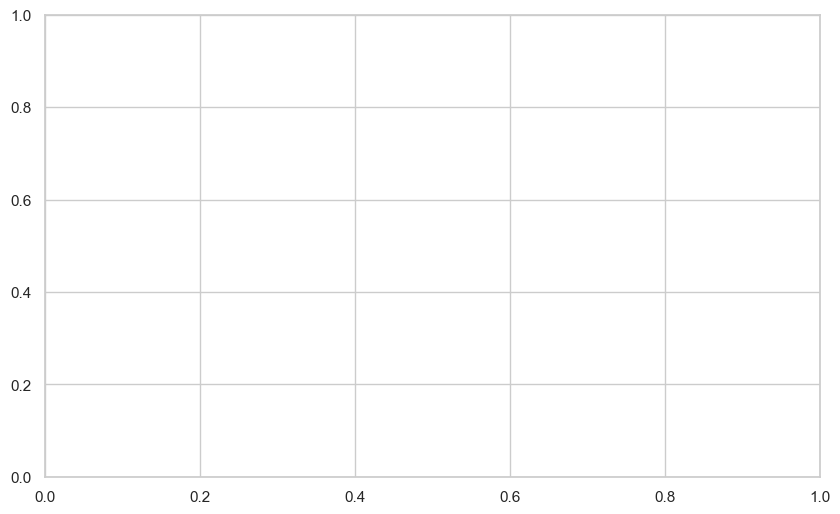

In [64]:
#Vamos entender a distribui√ß√£o geral das pontua√ß√µes novamente:

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

#sns.histplot(data=data, x='last_evaluation', stat='count', kde=True, hue='left', palette='coolwarm', multiple='stack' )

A pontua√ß√£o m√©dia das pessoas que sa√≠ram 